# 따릉이 대여량 예측


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 결측치

In [2]:
bicycle = pd.read_csv('./train.csv')

def check_missing_col(dataframe):
    counted_missing_col = 0
    for i, col in enumerate(bicycle.columns):
        missing_values = sum(bicycle[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

        if i == len(bicycle.columns) - 1 and counted_missing_col == 0:
            print('결측치가 존재하지 않습니다')

check_missing_col(bicycle)

결측치가 존재하지 않습니다


# 년월일 분리

In [3]:
def seperate_datetime(dataframe):
    year = []
    month = []
    day = []

    for date in dataframe.date_time:
        year_point, month_point, day_point = date.split('-') # - 기준으로 string을 나누고 list로 만듦 ex) '2016-04-01' -> ['2016', '04', '01']
        year.append(int(year_point))
        month.append(int(month_point))
        day.append(int(day_point))
    return year, month, day

df = bicycle
year, month, day = seperate_datetime(df)
    
df['year'] = year
df['month'] = month
df['day'] = day

df.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5


# 요일 생성

In [4]:
week_day = pd.to_datetime(bicycle['date_time']).dt.day_name()
df['week_day'] = week_day
df.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,week_day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1,Sunday
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2,Monday
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3,Tuesday
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4,Wednesday
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5,Thursday


In [5]:
from sklearn.preprocessing import LabelEncoder

# 요일 정보 추가
week_day = pd.to_datetime(df['date_time']).dt.day_name()
le = LabelEncoder()
le.fit(week_day)
df['week_day'] = le.transform(week_day)
df = df.drop(['date_time', 'number_of_rentals'],axis=1)
df.head()


,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day,week_day
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,2018,4,1,3
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,2018,4,2,1
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,2018,4,3,5
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,2018,4,4,6
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2018,4,5,4


In [6]:
# 1. "일교차가 너무 큰 날씨"를 알기 위한 정보
df['temp_diff_info'] = df['high_temp'] - df['low_temp']

# 2. "덥고 습한 날씨"를 알기 위한 정보
df['sweat_info'] = df['high_temp'] * df['humidity'] 

# 3. "춥고 바람부는 날씨"를 알기 위한 정보
df['cold_info'] = df['low_temp'] * df['wind_speed'] 

# 4. "불쾌지수"를 알기 위한 정보
df['humidity_angry'] = (1.8*df["high_temp"]) - 0.55*(1-(df["humidity"])/100) * (1.8*df["high_temp"]-26)+32
df.head()


,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day,week_day,temp_diff_info,sweat_info,cold_info,humidity_angry
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,2018,4,1,3,8.400,1575.000000,38.430000,68.177500
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,2018,4,2,1,6.188,1326.827000,41.997736,64.839468
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,2018,4,3,5,5.004,1146.846764,27.739280,59.352046
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,2018,4,4,6,4.056,888.628432,26.083056,54.841094
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2018,4,5,4,4.546,768.903064,18.717750,51.802038


In [7]:
def corr(X_human):
    human_number = X_human.select_dtypes(np.number)
    corr = human_number.corr()
    plt.figure(figsize=(20, 10))
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True
    )

    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )

    plt.title('Correlation heatmap', fontsize=30)
    plt.show()

In [8]:
def double_x(X_computer):
    col_list = X_computer.columns
    # 이중 for문을 사용하여 feature 자기 자신의 제곱과 두 feature간의 곱이라는 새로운 feature를 추가합니다.
    for i in range(len(col_list)):
        for j in range(i, len(col_list)):
            X_computer[f'{col_list[i]}*{col_list[j]}'] = X_computer[col_list[i]] * X_computer[col_list[j]]

    return X_computer

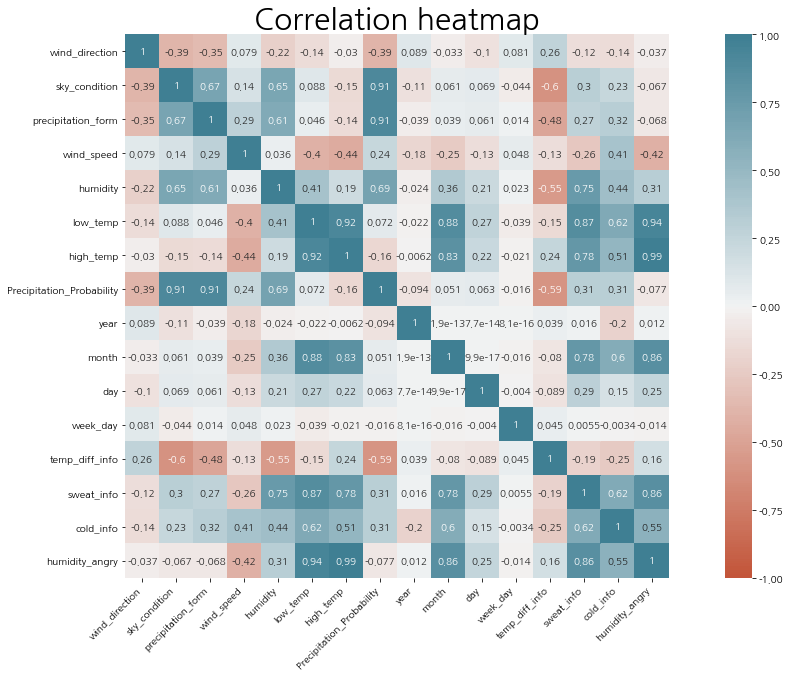

In [9]:
corr(df)

In [10]:
df2 = double_x(df)
df2.describe()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,...,temp_diff_info*temp_diff_info,temp_diff_info*sweat_info,temp_diff_info*cold_info,temp_diff_info*humidity_angry,sweat_info*sweat_info,sweat_info*cold_info,sweat_info*humidity_angry,cold_info*cold_info,cold_info*humidity_angry,humidity_angry*humidity_angry
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,...,273.000000,273.000000,273.000000,273.000000,2.730000e+02,273.000000,273.000000,273.000000,273.000000,273.000000
mean,202.750967,2.288256,0.100963,2.480963,56.745491,13.795249,23.384733,16.878103,2019.000000,5.000000,...,96.177676,12671.890557,303.674761,677.363645,1.986422e+06,47242.234569,97022.594785,1250.544545,2339.341040,5007.849799
std,56.659232,0.961775,0.203193,0.884397,12.351268,5.107711,5.204605,16.643772,0.817996,0.813489,...,38.264871,4461.989249,131.506842,167.730224,1.182504e+06,30903.010811,39125.132669,1157.460038,1137.009164,1010.814427
min,57.047000,1.000000,0.000000,0.753000,24.831000,1.938000,9.895000,0.000000,2018.000000,4.000000,...,11.675889,2901.966390,66.647680,222.435479,1.516708e+05,3285.427200,23097.759715,49.561600,384.738830,2622.710328
25%,171.541000,1.405000,0.000000,1.820000,47.196000,9.938000,19.842000,4.054000,2018.000000,4.000000,...,69.655716,9106.999401,210.236714,568.638880,9.564744e+05,23023.014225,63331.100044,481.550108,1451.716895,4214.630369
50%,209.774000,2.167000,0.000000,2.411000,55.845000,14.375000,24.158000,12.162000,2019.000000,5.000000,...,93.605625,13071.045816,297.725200,683.219161,1.795939e+06,45880.278332,97449.090703,1021.543107,2307.161647,5128.746453
75%,238.412000,3.000000,0.088000,2.924000,66.419000,18.000000,27.526000,22.973000,2020.000000,6.000000,...,121.859521,15672.810635,381.193548,797.670827,2.845643e+06,65043.236302,126268.103414,1634.929705,3020.678655,5827.957308
max,321.622000,4.000000,1.000000,5.607000,88.885000,22.312000,33.421000,82.162000,2020.000000,6.000000,...,189.172516,24333.312342,774.928000,1080.099218,5.331202e+06,214023.167931,182861.315857,11364.146308,8129.434283,7219.353770


In [11]:
df2.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,...,temp_diff_info*temp_diff_info,temp_diff_info*sweat_info,temp_diff_info*cold_info,temp_diff_info*humidity_angry,sweat_info*sweat_info,sweat_info*cold_info,sweat_info*humidity_angry,cold_info*cold_info,cold_info*humidity_angry,humidity_angry*humidity_angry
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,2018,4,...,70.560000,13230.000000,322.812000,572.691000,2.480625e+06,60527.250000,107379.562500,1476.864900,2620.061325,4648.171506
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,2018,4,...,38.291344,8210.405476,259.881990,401.226630,1.760470e+06,55723.730064,86030.757206,1763.809829,2723.110872,4204.156649
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,2018,4,...,25.040016,5738.821207,138.807357,296.997638,1.315258e+06,31812.703504,68067.701850,769.467655,1646.383022,3522.665360
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,2018,4,...,16.451136,3604.276920,105.792875,222.435479,7.896605e+05,23178.145155,48733.355794,680.325810,1430.423338,3007.545643
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2018,4,...,20.666116,3495.433329,85.090891,235.492066,5.912119e+05,14392.135326,39830.745996,350.354165,969.617603,2683.451176


In [12]:
df2

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,...,temp_diff_info*temp_diff_info,temp_diff_info*sweat_info,temp_diff_info*cold_info,temp_diff_info*humidity_angry,sweat_info*sweat_info,sweat_info*cold_info,sweat_info*humidity_angry,cold_info*cold_info,cold_info*humidity_angry,humidity_angry*humidity_angry
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,2018,4,...,70.560000,13230.000000,322.812000,572.691000,2.480625e+06,60527.250000,107379.562500,1476.864900,2620.061325,4648.171506
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,2018,4,...,38.291344,8210.405476,259.881990,401.226630,1.760470e+06,55723.730064,86030.757206,1763.809829,2723.110872,4204.156649
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,2018,4,...,25.040016,5738.821207,138.807357,296.997638,1.315258e+06,31812.703504,68067.701850,769.467655,1646.383022,3522.665360
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,2018,4,...,16.451136,3604.276920,105.792875,222.435479,7.896605e+05,23178.145155,48733.355794,680.325810,1430.423338,3007.545643
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2018,4,...,20.666116,3495.433329,85.090891,235.492066,5.912119e+05,14392.135326,39830.745996,350.354165,969.617603,2683.451176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,2020,6,...,49.364676,15158.123050,327.098943,553.273548,4.654516e+06,100440.364024,169890.480510,2167.414580,3666.086917,6201.025594
269,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,2020,6,...,64.480900,18160.317999,299.813926,649.133453,5.114649e+06,84439.209655,182821.113477,1394.031258,3018.246473,6534.869088
270,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,2020,6,...,64.850809,17017.591611,307.785660,647.077492,4.465610e+06,80766.466086,169800.510916,1460.768400,3071.066900,6456.500501
271,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,2020,6,...,40.640625,11680.899750,255.598453,480.815959,3.357316e+06,73463.926975,138195.783508,1607.518813,3023.964699,5688.494858


In [13]:
y = bicycle.number_of_rentals

In [14]:
def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score

In [15]:
from sklearn.linear_model import LinearRegression
def sc(df2,y):
    model = LinearRegression() # 모델 정의
    model.fit(df2, y) # 학습

    y_hat = model.predict(df2) # y 예측

    score = NMAE(y, y_hat)

    print(f'모델 NMAE: {score}')
    return y_hat

In [16]:
y_hat = sc(df2,y)

모델 NMAE: 0.10278949938992034


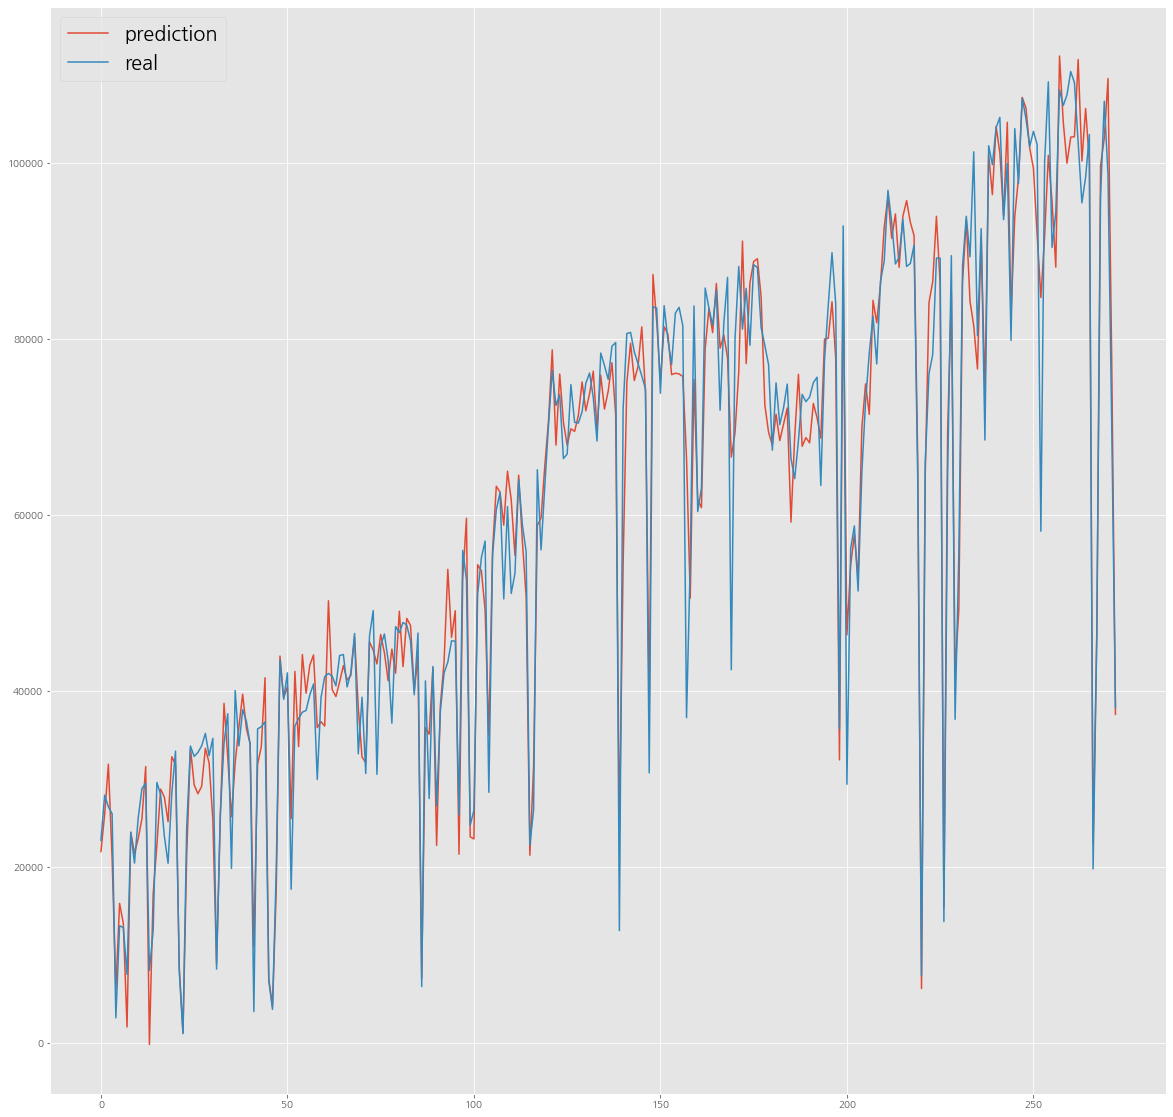

In [17]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20, 20))
plt.plot(y_hat, label = 'prediction')
plt.plot(y, label = 'real')
plt.legend(fontsize = 20)
plt.show()

In [64]:
df_y = pd.DataFrame(y)
y_hat
df_y['pred'] = y_hat
df_y

,number_of_rentals,pred
0,22994,21727.001841
1,28139,25944.972599
2,26817,31658.835800
3,26034,20899.153446
4,2833,6082.431223
...,...,...
268,96150,99653.392294
269,107001,102814.900011
270,98568,109578.689264
271,70053,77303.255558


In [65]:
df_y.columns = ["real", "pred"]
df_y["distance"] = df_y['real'].astype(float)-df_y["pred"]
df_y

,real,pred,distance
0,22994,21727.001841,1266.998159
1,28139,25944.972599,2194.027401
2,26817,31658.835800,-4841.835800
3,26034,20899.153446,5134.846554
4,2833,6082.431223,-3249.431223
...,...,...,...
268,96150,99653.392294,-3503.392294
269,107001,102814.900011,4186.099989
270,98568,109578.689264,-11010.689264
271,70053,77303.255558,-7250.255558


In [66]:
df_y2 = df_y

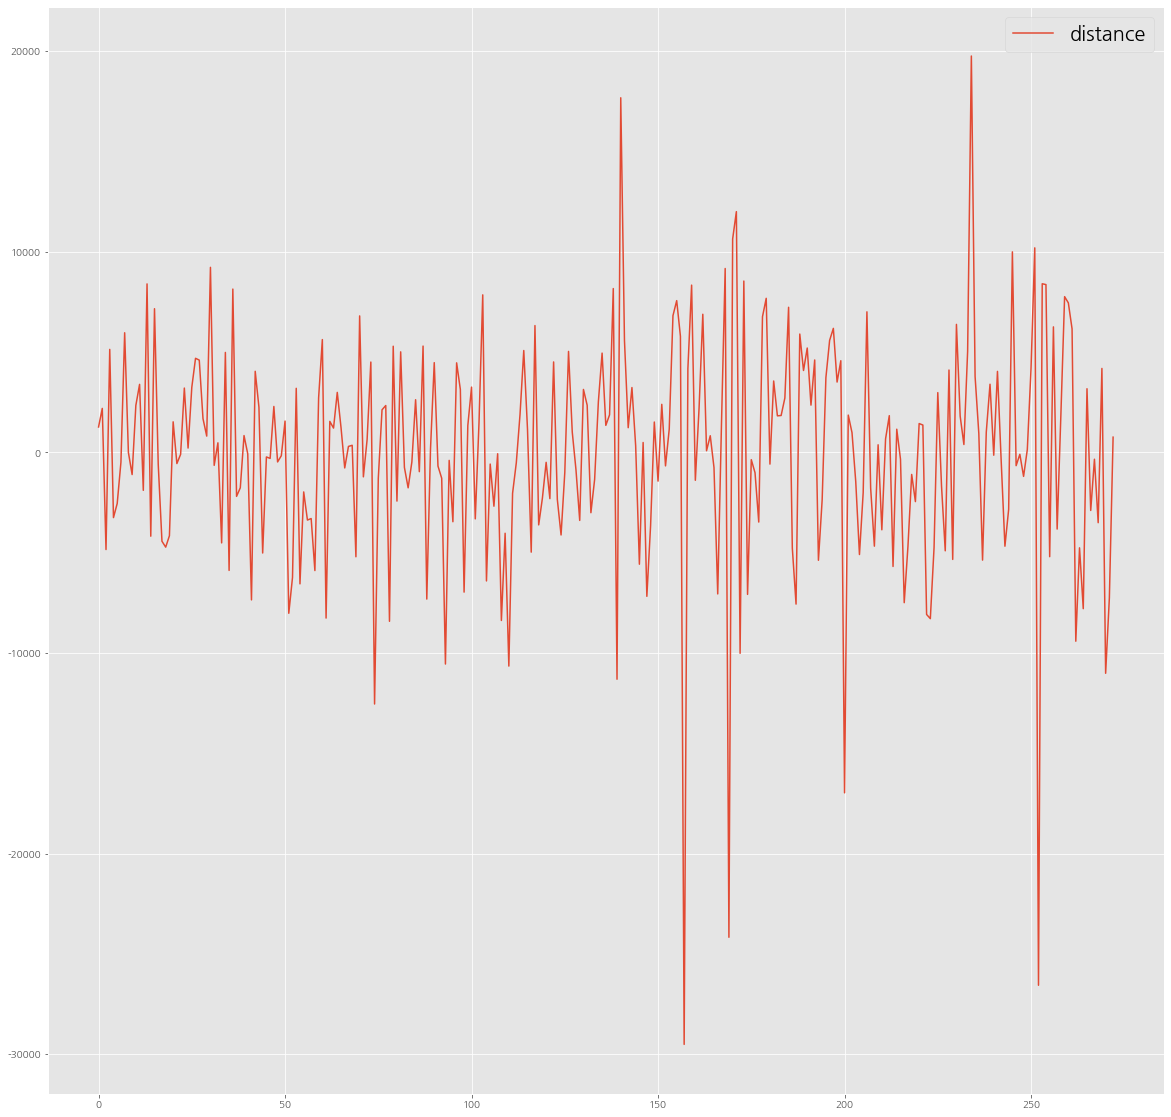

In [78]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 20))
plt.plot(df_y2['distance'], label = "distance")
plt.legend(fontsize = 20)
plt.show()

In [101]:
df

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,...,temp_diff_info*temp_diff_info,temp_diff_info*sweat_info,temp_diff_info*cold_info,temp_diff_info*humidity_angry,sweat_info*sweat_info,sweat_info*cold_info,sweat_info*humidity_angry,cold_info*cold_info,cold_info*humidity_angry,humidity_angry*humidity_angry
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,2018,4,...,70.560000,13230.000000,322.812000,572.691000,2.480625e+06,60527.250000,107379.562500,1476.864900,2620.061325,4648.171506
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,2018,4,...,38.291344,8210.405476,259.881990,401.226630,1.760470e+06,55723.730064,86030.757206,1763.809829,2723.110872,4204.156649
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,2018,4,...,25.040016,5738.821207,138.807357,296.997638,1.315258e+06,31812.703504,68067.701850,769.467655,1646.383022,3522.665360
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,2018,4,...,16.451136,3604.276920,105.792875,222.435479,7.896605e+05,23178.145155,48733.355794,680.325810,1430.423338,3007.545643
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2018,4,...,20.666116,3495.433329,85.090891,235.492066,5.912119e+05,14392.135326,39830.745996,350.354165,969.617603,2683.451176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,2020,6,...,49.364676,15158.123050,327.098943,553.273548,4.654516e+06,100440.364024,169890.480510,2167.414580,3666.086917,6201.025594
269,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,2020,6,...,64.480900,18160.317999,299.813926,649.133453,5.114649e+06,84439.209655,182821.113477,1394.031258,3018.246473,6534.869088
270,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,2020,6,...,64.850809,17017.591611,307.785660,647.077492,4.465610e+06,80766.466086,169800.510916,1460.768400,3071.066900,6456.500501
271,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,2020,6,...,40.640625,11680.899750,255.598453,480.815959,3.357316e+06,73463.926975,138195.783508,1607.518813,3023.964699,5688.494858


In [95]:
df_y2_up = df_y2[df_y2['distance']>500]
df_y2_co = df_y2[(df_y2['distance']<=500) & (df_y2['distance']>=-500)]
df_y2_do = df_y2[df_y2['distance']<-500]

In [113]:
ad = list()
for i in df_y2_up.index:
    ad.append(bicycle[i:])
ad

[      date_time  wind_direction  sky_condition  precipitation_form  \
 0    2018-04-01         207.500          4.000               0.000   
 1    2018-04-02         208.317          2.950               0.000   
 2    2018-04-03         213.516          2.911               0.000   
 3    2018-04-04         143.836          3.692               0.425   
 4    2018-04-05          95.905          4.000               0.723   
 ..          ...             ...            ...                 ...   
 268  2020-06-26         228.662          3.980               0.223   
 269  2020-06-27         207.770          2.865               0.081   
 270  2020-06-28         282.568          1.730               0.000   
 271  2020-06-29         137.027          2.257               0.088   
 272  2020-06-30         120.797          3.622               0.432   
 
      wind_speed  humidity  low_temp  high_temp  Precipitation_Probability  \
 0         3.050    75.000    12.600     21.000                     

In [114]:
ae = list()
for i in df_y2_co.index:
    ae.append(bicycle[i:])
ae

[      date_time  wind_direction  sky_condition  precipitation_form  \
 6    2018-04-07         288.858          1.912               0.000   
 7    2018-04-08         200.939          2.405               0.054   
 8    2018-04-09         165.196          2.000               0.000   
 9    2018-04-10         171.541          2.919               0.088   
 10   2018-04-11         249.716          1.892               0.122   
 ..          ...             ...            ...                 ...   
 268  2020-06-26         228.662          3.980               0.223   
 269  2020-06-27         207.770          2.865               0.081   
 270  2020-06-28         282.568          1.730               0.000   
 271  2020-06-29         137.027          2.257               0.088   
 272  2020-06-30         120.797          3.622               0.432   
 
      wind_speed  humidity  low_temp  high_temp  Precipitation_Probability  \
 6         4.824    45.541     1.938     10.947                     

In [115]:
af = list()
for i in df_y2_do.index:
    af.append(bicycle[i:])
af

[      date_time  wind_direction  sky_condition  precipitation_form  \
 2    2018-04-03         213.516          2.911               0.000   
 3    2018-04-04         143.836          3.692               0.425   
 4    2018-04-05          95.905          4.000               0.723   
 5    2018-04-06         256.412          3.466               0.358   
 6    2018-04-07         288.858          1.912               0.000   
 ..          ...             ...            ...                 ...   
 268  2020-06-26         228.662          3.980               0.223   
 269  2020-06-27         207.770          2.865               0.081   
 270  2020-06-28         282.568          1.730               0.000   
 271  2020-06-29         137.027          2.257               0.088   
 272  2020-06-30         120.797          3.622               0.432   
 
      wind_speed  humidity  low_temp  high_temp  Precipitation_Probability  \
 2         2.690    74.879    10.312     15.316                     

In [97]:
df_y2_co

,real,pred,distance
6,13088,13577.927338,-489.927338
8,23925,23924.524889,0.475111
22,1037,1133.325474,-96.325474
24,33728,33510.752808,217.247192
32,25963,25485.056694,477.943306
40,33923,33996.454273,-73.454273
45,7072,7298.597519,-226.597519
46,3802,4100.766363,-298.766363
48,43471,43945.262918,-474.262918
49,39036,39200.646523,-164.646523


In [18]:
test = pd.read_csv('test.csv') # 데이터를 불러온 뒤
submission  = pd.read_csv('sample_submission.csv')

check_missing_col(test) # 결측치 확인

year, month, day = seperate_datetime(test) #날짜 숫자로 분리 후 

#새로운 컬럼을 생성
test['year'] = year 
test['month'] = month
test['day'] = day

# date_time은 제거합니다.
test_X = test.drop('date_time', axis = 1)

결측치가 존재하지 않습니다


In [19]:
# 요일 정보 추가

week_day = pd.to_datetime(test['date_time']).dt.day_name()
le = LabelEncoder()
le.fit(week_day)
test_X['week_day'] = le.transform(week_day)

# 1. "일교차가 너무 큰 날씨"를 알기 위한 정보
test_X['temp_diff_info'] = test_X['high_temp'] - test_X['low_temp']

# 2. "덥고 습한 날씨"를 알기 위한 정보
test_X['sweat_info'] = test_X['high_temp'] * test_X['humidity'] 

# 3. "춥고 바람부는 날씨"를 알기 위한 정보
test_X['cold_info'] = test_X['low_temp'] * test_X['wind_speed'] 

# 4. "불쾌지수"를 알기 위한 정보
test_X['humidity_angry'] = (1.8*test_X["high_temp"]) - 0.55*(1-(test_X["humidity"])/100) * (1.8*test_X["high_temp"]-26)+32

test_X

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day,week_day,temp_diff_info,sweat_info,cold_info,humidity_angry
0,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333,2021,4,1,4,8.867,585.558111,34.220000,64.785676
1,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500,2021,4,2,0,7.000,881.923000,31.944000,63.783407
2,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847,2021,4,3,2,7.493,1264.558944,19.214375,61.029320
3,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671,2021,4,4,3,11.118,1099.185984,23.418750,62.199837
4,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459,2021,4,5,1,11.496,900.120384,11.213280,63.456064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,177.149,3.980,0.223,1.066,74.628,20.312,28.579,36.486,2021,6,26,2,8.267,2132.793612,21.652592,79.891843
87,138.723,2.777,0.135,1.290,70.236,20.812,29.000,18.378,2021,6,27,3,8.188,2036.844000,26.847480,79.911008
88,111.095,3.338,1.270,1.692,70.338,21.000,28.789,35.946,2021,6,28,1,7.789,2024.960682,35.532000,79.607867
89,171.622,3.270,0.595,1.470,70.473,21.000,29.421,27.770,2021,6,29,5,8.421,2073.386133,30.870000,80.579894


In [20]:
test_X = double_x(test_X)

In [21]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth = 3, random_state = 0)
model.fit(df2, y)

RandomForestRegressor(max_depth=3, random_state=0)

In [22]:
# train data로 학습시킨 모델에 test_X데이터를 넣고 예측합니다.
test_yhat = model.predict(test_X)

# submission dataFrame 완성
submission['number_of_rentals'] = test_yhat

# 제출 파일 생성
submission.to_csv('submission.csv', index= False)